<a href="https://colab.research.google.com/github/Sameer-Jha/AgeHeightRegression/blob/main/AgeHeightRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Age vs Height Regression

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [6]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2021-11-21 11:29:46--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-11-21 11:29:46--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-11-21 11:29:46 (229 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [24]:
data = pd.read_pickle('/content/AgesAndHeights.pkl')
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba8bca2c10>,
      dtype=object)

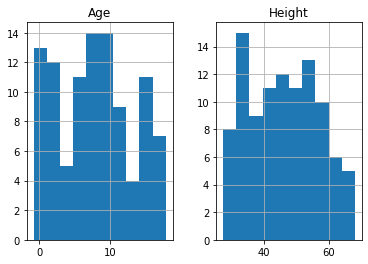

In [25]:
# Filtering data for improper values
data.hist()

In [50]:
ages = data['Age']
heights = data['Height']

In [51]:
data = data[ ages > 0 ]
ages = data['Age']
data = data[ heights > 0 ]
heights = data['Height']

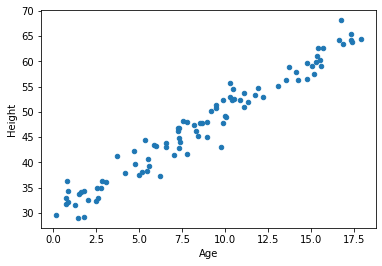

In [52]:
data.plot.scatter(x='Age', y='Height')

In [53]:
plot = px.scatter(x=ages, y=heights, title="Age vs Height", labels={'x': 'Ages', 'y': 'Height'})
plot.show()

In [54]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

In [55]:
ages_np = ages_np.reshape(len(ages_np), 1)
# heights = heights_np.reshape(len(heights_np), 1)

In [56]:
model = LinearRegression().fit(ages_np, heights)
model.coef_

array([2.0014169])

In [61]:
x_new = np.array(list(range(19))).reshape(19, 1)
predictions = model.predict(x_new)

In [63]:
plot_with_prediction = px.scatter(x=ages, y=heights, title="Age vs Height", labels={'x': 'Ages', 'y': 'Height'})
plot_with_prediction.add_trace(go.Scatter( x = x_new.reshape(19), y = predictions, mode='lines', name='Model' ))
plot_with_prediction.show()

In [64]:
from joblib import dump, load

In [65]:
dump(model, 'age_height_regression.joblib')

['age_height_regression.joblib']

In [72]:
model_in = load('/content/age_height_regression.joblib')
model_in.predict(np.array([[1]]))

array([31.96327451])